# Testing 2D_DWT.py

## Parameters

In [28]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import math
import numpy as np
from scipy import signal
import cv2
import os
import pywt
import pylab
!ln -sf ~/quantization/deadzone_quantizer.py .
import image_1
import image_3
import DWT

In [2]:
#prefix = "/home/vruiz/MRVC/sequences/stockholm/"
prefix = "/home/vruiz/MRVC/sequences/lena_color/"
frame = image.read(prefix, 0)

image_3.read: /home/vruiz/MRVC/sequences/lena_color/000.png (512, 512, 3) uint8 512673 


component=0 max=255 min=54 dtype=uint8
component=1 max=248 min=1 dtype=uint8
component=2 max=239 min=8 dtype=uint8


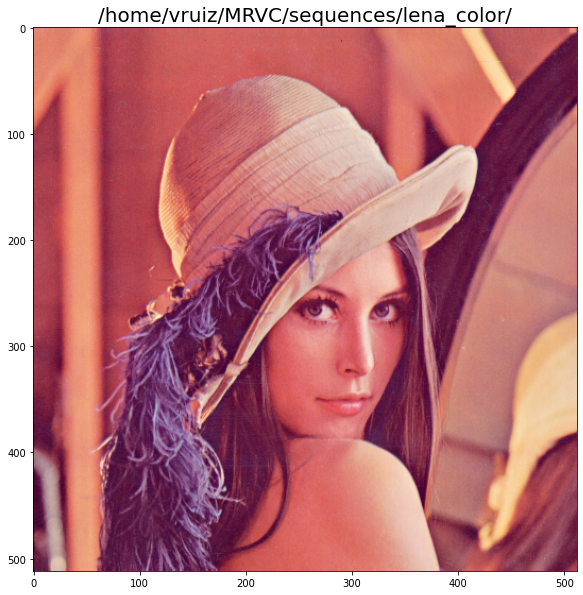

In [3]:
image.show(frame, prefix)

## Testing reversebility
In the RGB domain.

In [4]:
decomposition = DWT.analyze(frame, N_levels=3)
reconstructed_frame = DWT.synthesize(decomposition, N_levels=3).astype(np.int16)
(frame == reconstructed_frame).all()

Wavelet haar
  Family name:    Haar
  Short name:     haar
  Filters length: 2
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric
  DWT:            True
  CWT:            False


False

In [5]:
type(decomposition)

list

In [6]:
len(decomposition)

4

In [7]:
type(decomposition[0])

numpy.ndarray

In [8]:
decomposition[0].shape

(64, 64, 3)

In [9]:
type(decomposition[1])

tuple

In [10]:
len(decomposition[1])

3

In [11]:
lowest_resolution = decomposition[0]
print(type(lowest_resolution), lowest_resolution.shape)
for resolution in decomposition[1:]:
    print(type(resolution))
    for subband in resolution:
        print(type(subband), subband.shape)

<class 'numpy.ndarray'> (64, 64, 3)
<class 'tuple'>
<class 'numpy.ndarray'> (64, 64, 3)
<class 'numpy.ndarray'> (64, 64, 3)
<class 'numpy.ndarray'> (64, 64, 3)
<class 'tuple'>
<class 'numpy.ndarray'> (128, 128, 3)
<class 'numpy.ndarray'> (128, 128, 3)
<class 'numpy.ndarray'> (128, 128, 3)
<class 'tuple'>
<class 'numpy.ndarray'> (256, 256, 3)
<class 'numpy.ndarray'> (256, 256, 3)
<class 'numpy.ndarray'> (256, 256, 3)


In [12]:
reconstructed_frame.shape

(512, 512, 3)

component=0 max=255 min=54 dtype=uint8
component=1 max=248 min=1 dtype=uint8
component=2 max=239 min=8 dtype=uint8


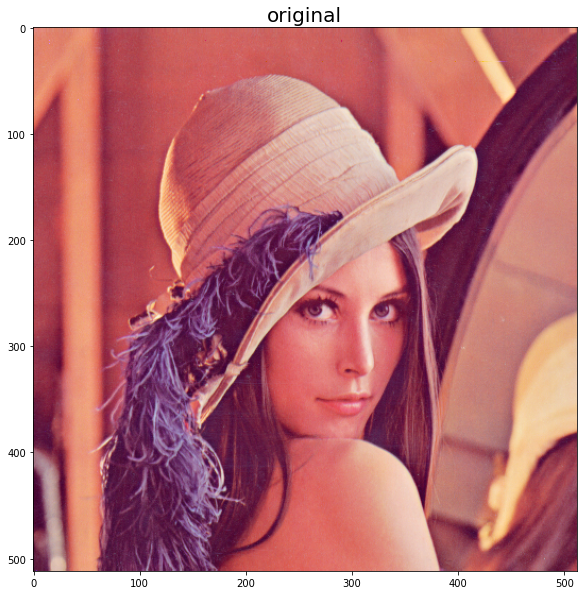

In [13]:
image.show(frame, "original")

component=0 max=255 min=54 dtype=int16
component=1 max=248 min=0 dtype=int16
component=2 max=239 min=8 dtype=int16


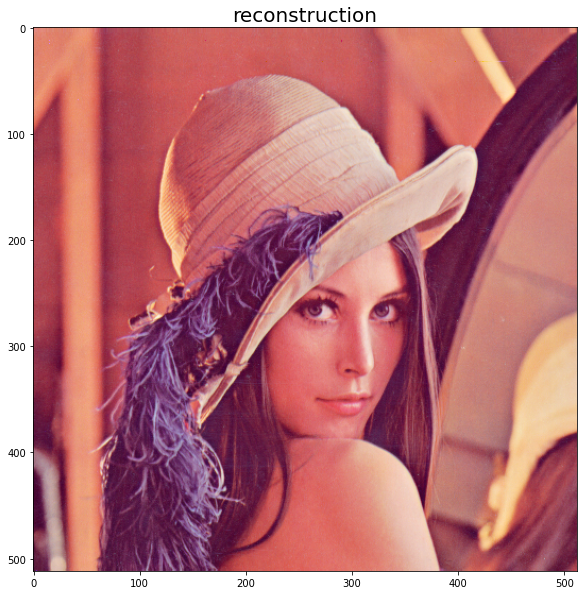

In [14]:
image.show(reconstructed_frame, "reconstruction")

component=0 max=1.0 min=0.0 dtype=float64
component=1 max=1.0 min=0.0 dtype=float64
component=2 max=1.0 min=0.0 dtype=float64


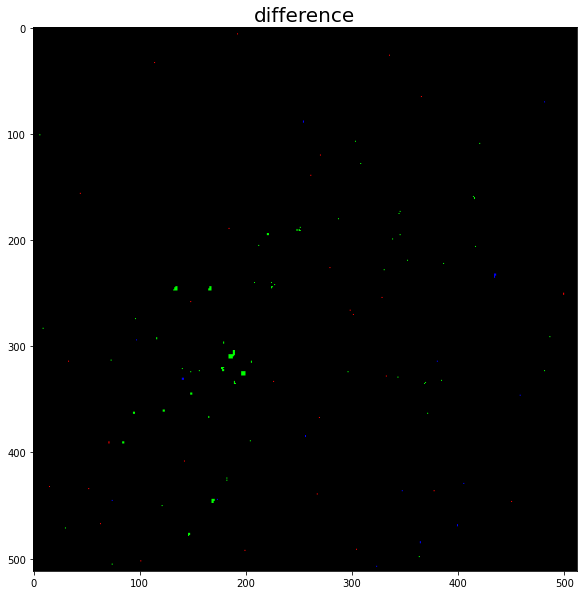

In [15]:
image.show(image.normalize(frame - reconstructed_frame), "difference")

### Reading and writting decompositions

In [22]:
a = [1,2,3]
type(a)
b = tuple(a)
b

(1, 2, 3)

In [26]:
component_decomp = [decomposition[0][..., 0]]
for resolution in decomposition[1:]:
    resolution_decomp = [] 
    for subband in resolution:
        resolution_decomp.append(subband[..., 0])
    component_decomp.append(tuple(resolution_decomp))
arr, coeff_slices = pywt.coeffs_to_array(component_decomp)
arr.shape

(512, 512)

2021.625000000001 -418.75000000000017 float64


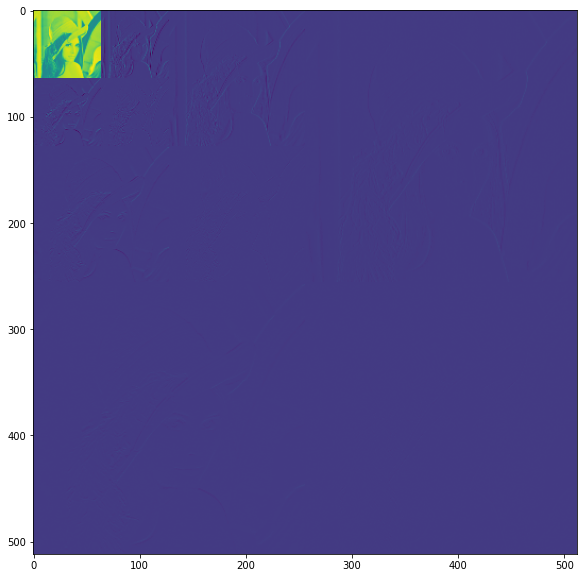

In [29]:
image_1.show(arr)

In [16]:
DWT.write(decomposition, "/tmp/", 0, N_levels=3)

NameError: name 'RGB_decomposition' is not defined

In [ ]:
_RGB_decomposition = DWT.read("/tmp/", 0, N_levels=3)

In [ ]:
RGB_decomposition.shape

### In the YCoCg domain

In [ ]:
YCoCg_frame = YCoCg.from_RGB(RGB_frame.astype(np.int16))
YCoCg_decomposition = DWT.analyze(YCoCg_frame, N_levels=2)
YCoCg_reconstructed_frame = DWT.synthesize(YCoCg_decomposition, N_levels=2)
RGB_reconstructed_frame = YCoCg.to_RGB(YCoCg_reconstructed_frame).astype(np.int16)
(RGB_frame == RGB_reconstructed_frame).all()

In [ ]:
image.show(RGB_frame, "original") 

In [ ]:
image.show(RGB_reconstructed_frame, "reconstruction")

In [ ]:
show(RGB_frame - RGB_reconstructed_frame, "difference")

### Reading and writting decompositions

In [ ]:
DWT.write(RGB_decomposition, "/tmp/", 0, N_levels=2)

In [ ]:
RGB_decomposition = DWT.read("/tmp/", 0, N_levels=2)

In [ ]:
YCoCg_reconstructed_frame = DWT.synthesize(YCoCg_decomposition, N_levels=2)
RGB_reconstructed_frame = YCoCg.to_RGB(YCoCg_reconstructed_frame).astype(np.int16)
image.show(RGB_reconstructed_frame, "reconstruction")

## Quantizing the RGB domain

In [ ]:
RGB_points = []
with open('../05-RGB_compression/RGB.txt', 'r') as f:
    for line in f:
        rate, _distortion = line.split('\t')
        RGB_points.append((float(rate), float(_distortion)))

## Quantizing the YCoCg domain

In [ ]:
YCoCg_points = []
with open('../06-YUV_compression/YCoCg.txt', 'r') as f:
    for line in f:
        rate, _distortion = line.split('\t')
        YCoCg_points.append((float(rate), float(_distortion)))

## Quantizing the YCoCg+DCT domain

In [ ]:
DCT_points = []
with open('../07-DCT/DCT.txt', 'r') as f:
    for line in f:
        rate, _distortion = line.split('\t')
        DCT_points.append((float(rate), float(_distortion)))

## Quantizing the YCoCg/DWT domain

In [ ]:
def bytes_per_frame(img):
    frame.write(img, "/tmp/frame")
    length_in_bytes = os.path.getsize("/tmp/frame.png")
    return length_in_bytes

def bits_per_pixel(img):
    return 8*bytes_per_frame(img)/np.size(img)

def bytes_per_grayframe(img):
    cv2.imwrite("/tmp/frame.png", img)
    length_in_bytes = os.path.getsize("/tmp/frame.png")
    return length_in_bytes

def bits_per_graypixel(img):
    return 8*bytes_per_grayframe(img)/np.size(img)

In [ ]:
N_LEVELS = 3
def _DWT_RD_curve(RGB_frame, n_levels=N_LEVELS):
    n_channels = RGB_frame.shape[2]
    RD_points = []
    for q_step in range(0, 8):
        YCoCg_frame = YCoCg.from_RGB(RGB_frame.astype(np.int16))
        YCoCg_decomposition = DWT.analyze(YCoCg_frame, n_levels=n_levels)
        dequantized_YCoCg_decomposition = []
        rate = 0
        for channel in range(n_channels):
            # In a channel there is a decomposition
            decomposition = YCoCg_decomposition[channel]
            cAn = decomposition[0]
            k, dequantized_cAn = q_deq(cAn, 1<<q_step)
            k = k.astype(np.uint8)
            dequantized_decomposition = [dequantized_cAn]
            rate += bytes_per_frame(k)
            rest_of_resolutions = decomposition[1:]
            for resolution in rest_of_resolutions:
                # In a resolution there is/are one/three subbands
                dequantized_resolution = []
                for subband in resolution:
                    k, dequantized_subband = q_deq(subband, 1<<q_step)
                    k = k.astype(np.uint8)
                    rate += bytes_per_grayframe(k)
                    dequantized_resolution.append(dequantized_subband)
                dequantized_decomposition.append(tuple(dequantized_resolution))
            dequantized_YCoCg_decomposition.append(dequantized_decomposition)
        reconstructed_YCoCg_frame = DWT.synthesize(dequantized_YCoCg_decomposition)
        reconstructed_RGB_frame = YCoCg.to_RGB(reconstructed_YCoCg_frame)
        distortion = MSE(RGB_frame, reconstructed_RGB_frame)
        print(f"q_step={1<<q_step:>3}, rate={rate:>7} bytes, distortion={distortion:>6.1f}")
        RD_points.append((rate, distortion))
    return RD_points

def DWT_RD_curve(RGB_frame, N_levels):
    n_channels = RGB_frame.shape[2]
    RD_points = []
    for q_step in range(0, 8):
        YUV_frame = YCoCg.from_RGB(RGB_frame.astype(np.int16))
        YUV_decomposition = DWT.analyze(YUV_frame, N_levels=N_levels)
        dequantized_YUV_decomposition = []
        rate = 0
        cAn = YUV_decomposition[0]
        dequantized_cAn, k = q_deq(cAn, 1<<q_step)
        #rate += bytes_per_frame(k.astype(np.uint8))
        rate += image.write((k + 128).astype(np.uint8), f"/tmp/{q_step}_", 0)
        dequantized_YUV_decomposition.append(dequantized_cAn)
        rest_of_resolutions = YUV_decomposition[1:]
        for resolution in rest_of_resolutions:
            dequantized_resolution = []
            for subband in resolution:
                dequantized_subband, k  = q_deq(subband, 1<<q_step)
                #rate += bytes_per_frame(k.astype(np.uint8))
                rate += image.write((k + 128).astype(np.uint8), f"/tmp/{q_step}_", 0)
                dequantized_resolution.append(dequantized_subband)
            dequantized_YUV_decomposition.append(tuple(dequantized_resolution))
        reconstructed_YUV_frame = DWT.synthesize(dequantized_YUV_decomposition, N_levels=N_levels)
        reconstructed_RGB_frame = YCoCg.to_RGB(reconstructed_YUV_frame)
        _distortion = distortion.MSE(RGB_frame, reconstructed_RGB_frame)
        print(f"q_step={1<<q_step:>3}, rate={rate:>7} bytes, distortion={_distortion:>6.1f}")
        RD_points.append((8*rate/RGB_frame.size, _distortion))
    return RD_points

DWT_points_1 = DWT_RD_curve(RGB_frame, N_levels=1)
DWT_points_2 = DWT_RD_curve(RGB_frame, N_levels=2)
DWT_points_3 = DWT_RD_curve(RGB_frame, N_levels=3)

In [ ]:
pylab.figure(dpi=150)
pylab.plot(*zip(*DWT_points_1), c='r', marker="x", label='DWT(n_levels=1)')
pylab.plot(*zip(*DWT_points_2), c='g', marker="x", label='DWT(n_levels=2)')
pylab.plot(*zip(*DWT_points_3), c='b', marker="x", label='DWT(n_levels=3)')
pylab.title("Impact of the Number of Levels")
pylab.xlabel("Bits/Pixel")
pylab.ylabel("MSE")
plt.legend(loc='upper right')
pylab.show()

In [ ]:
pylab.figure(dpi=150)
#pylab.plot(*zip(*RGB_points), c='b', marker="x", label='RGB')
#pylab.plot(*zip(*YCoCg_points), c='g', marker="x", label='YCoCg')
pylab.plot(*zip(*DWT_points_3), c='r', marker="x", label='YCoCg+DWT')
pylab.plot(*zip(*DCT_points), c='m', marker="x", label='DCT')
pylab.title("Global Performance")
pylab.xlabel("Bits/Pixel")
pylab.ylabel("MSE")
plt.legend(loc='upper right')
#plt.yscale('log')
pylab.show()

In [ ]:
with open('DWT3.txt', 'w') as f:
    for item in DWT_points_3:
        f.write(f"{item[0]}\t{item[1]}\n")

## Ignore the rest

In [ ]:
def RGB_to_YCoCg(RGB_frame):
    R, G, B = RGB_frame[:,:,0], RGB_frame[:,:,1], RGB_frame[:,:,2]
    YCoCg_frame = np.empty_like(RGB_frame)
    YCoCg_frame[:,:,0] =  R/4 + G/2 + B/4 
    YCoCg_frame[:,:,1] =  R/2       - B/2
    YCoCg_frame[:,:,2] = -R/4 + G/2 - B/4
    return YCoCg_frame

def YCoCg_to_RGB(YCoCg_frame):
    Y, Co, Cg = YCoCg_frame[:,:,0], YCoCg_frame[:,:,1], YCoCg_frame[:,:,2]
    RGB_frame = np.empty_like(YCoCg_frame)
    RGB_frame[:,:,0] = Y + Co - Cg 
    RGB_frame[:,:,1] = Y      + Cg
    RGB_frame[:,:,2] = Y - Co - Cg
    return RGB_frame

In [ ]:
def _average_energy(x):
    return np.sum(x.astype(np.double)*x.astype(np.double))/(np.size(x))

def _MSE(x, y):
    error_signal = x.astype(np.float32) - y
    return average_energy(error_signal)

def _RMSE(x, y):
    error_signal = x.astype(np.float32) - y
    return math.sqrt(MSE(error_signal))

In [ ]:
def bytes_per_frame(_frame):
    frame.write(_frame, "/tmp/frame")
    length_in_bytes = os.path.getsize("/tmp/frame.png")
    return length_in_bytes

def bits_per_pixel(img):
    return 8*bytes_per_frame(img)/np.size(img)

def bytes_per_grayframe(_frame):
    cv2.imwrite("/tmp/frame.png", _frame)
    length_in_bytes = os.path.getsize("/tmp/frame.png")
    return length_in_bytes

def bits_per_graypixel(img):
    return 8*bytes_per_grayframe(img)/np.size(img)

In [ ]:
WAVELET = pywt.Wavelet("db5")
#WAVELET = pywt.Wavelet("bior3.5")
N_LEVELS = 3

def color_DWT_analyze(color_frame, wavelet=WAVELET, n_levels=N_LEVELS):
    n_channels = color_frame.shape[2]
    color_decomposition = [None]*n_channels
    for c in range(n_channels):
        color_decomposition[c] = pywt.wavedec2(data=color_frame[:,:,c], wavelet=wavelet, mode='per', level=n_levels)
    return color_decomposition # A list of "gray" decompositions

def _color_DWT_analyze(color_frame, wavelet=WAVELET, n_levels=N_LEVELS):
    n_channels = color_frame.shape[0]
    color_decomposition = [None]*n_channels
    for c in range(n_channels):
        color_decomposition[c] = pywt.wavedec2(data=color_frame[c], wavelet=wavelet, mode='per', level=n_levels)
    return color_decomposition # A list of "gray" decompositions

def color_DWT_synthesize(color_decomposition, wavelet=WAVELET):
    n_channels = len(color_decomposition)
    #n_levels = len(color_decomposition[0])-1
    # color_decomposition[0] <- First channel
    # color_decomposition[0][0] <- cAn (lowest frequecy subband) of the first channel
    # color_decomposition[0][1] <- (cHn, cVn, cDn) (lowest high-frequency subbands) of the first channel
    # color_decomposition[0][1][0] <- cHn (LH subband) of the first channel
    # See https://pywavelets.readthedocs.io/en/latest/ref/2d-dwt-and-idwt.html#d-multilevel-decomposition-using-wavedec2
    _color_frame = []
    for c in range(n_channels):
        frame = pywt.waverec2(color_decomposition[c], wavelet=wavelet, mode='per')
        _color_frame.append(frame)
    n_rows = _color_frame[0].shape[0]
    n_columns = _color_frame[0].shape[1]
    color_frame = np.ndarray((n_rows, n_columns, n_channels), np.float64)
    for c in range(n_channels):
        color_frame[:,:,c] = _color_frame[c][:,:]
    return color_frame

def _color_DWT_synthesize(color_decomposition, wavelet=WAVELET):
    n_channels = len(color_decomposition)
    #n_levels = len(color_decomposition[0])-1
    # color_decomposition[0] <- First channel
    # color_decomposition[0][0] <- cAn (lowest frequecy subband) of the first channel
    # color_decomposition[0][1] <- (cHn, cVn, cDn) (lowest high-frequency subbands) of the first channel
    # color_decomposition[0][1][0] <- cHn (LH subband) of the first channel
    # See https://pywavelets.readthedocs.io/en/latest/ref/2d-dwt-and-idwt.html#d-multilevel-decomposition-using-wavedec2
    _color_frame = []
    for c in range(n_channels):
        _frame = pywt.waverec2(color_decomposition[c], wavelet=wavelet, mode='per')
        _color_frame.append(_frame)
    #n_rows = _color_frame[1].shape[0]
    #n_columns = _color_frame[2].shape[1]
    #color_frame = np.ndarray((n_channels, n_rows, n_columns), np.float64)
    #for c in range(n_channels):
    #    color_frame[c] = _color_frame[c][:,:]
    return np.array(_color_frame)